In [ ]:
# Importing Libraries

import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import confusion_matrix, auc,roc_auc_score,roc_curve,recall_score,classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

# IMPORTING DATA

In [ ]:
# Function to Load the file at specified path
# Parameters :- 1. path :- path from where file should be I

def Load_File(path) :
    if os.path.isfile(path) :
        data = pd.read_csv(path)
        data = data.replace('?', np.nan)
        print("\n" + "Number of rows in data are %s" % len(data))
        print("Number of columns in data are %s" % len(data.columns) + "\n")
        print("Following are the data types of columns:- ")
        print(data.dtypes)
        print("Number of missing values in the data are:- ")
        print(data.isnull().sum())
        print("Data Import is Complete")
        
        return data
    else:
        print(path + " does not exist. Enter the correct path")
        

# Generalized Function to plot the counts
# Parameters
# 1. rotx  : rotation of ticks on x-axis
# 2. roty  : rotation of ticks on y-axis
# 3. fontx : font size of ticks on x-axis
# 4. fonty : font size of ticks on y-axis
# 5. column_name : Name of the column for which we need the count
# 6. data_name   : Dataframe Used for plotting
# 7. plot_size   : Size of the plot
# 8. hue : If second column is needed for getting the count, the hue is True else False
# 9. hue_column_name = Second Column for plotting


def countplot(rotx, roty, fontx, fonty, column_name, data_name, plot_size = (10, 5), hue = False, hue_column_name=None):
    plt.figure(figsize = plot_size)
    plt.xticks(rotation=rotx, fontsize=fontx)
    plt.yticks(rotation=roty, fontsize=fonty)
    sns.set_style("whitegrid")
    if not hue:
        sns.countplot(column_name, data=data_name, palette='husl',
                      order = data_name[column_name].value_counts().index)
    else:
        sns.countplot(column_name, data=data_name, 
                      palette='husl', hue = hue_column_name,
                      order = data_name[column_name].value_counts().index)
    sns.despine()


# Function to Encode the Categorical Data Columns
# Parameters 1. df :- Dataframe 2. Column_name :- Feature to encode

def categorical_encoding(df, column_name_list=[]):
    
    for column_name in column_name_list:
        print(df[column_name].unique())
        categorical_columns = pd.get_dummies(df[column_name], prefix = column_name, 
                                             prefix_sep = '_', drop_first = False)
        df = pd.concat([df, categorical_columns], axis = 1)
        df = df.drop(column_name, axis = 1)
    return df


# Function to Label Encode the data
# Parameters :- 1. data :- Dataframe 2. columns_list :- List of columns to label encode

def labelEncoder(data, columns_list):
    for col in columns_list:
        encoder = LabelEncoder()
        data[col]  = encoder.fit_transform(data[col])
    return data


# Function to plot stacked plot
# Paramteres :- 
# data :- Dataframe used for plotting
# column_one :- Column One to group by
# column_two : Column Two to group by
# agg_column : Column to count numbers

def stacked_plot(data, column_one, column_two, agg_column, plot_size=(10, 5)):
    pal     = sns.color_palette("colorblind")
    grouped = data.groupby([column_one, column_two])[agg_column].count()
    grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    grouped = grouped.unstack(column_two).fillna(0)
    print(grouped)
    unique_list = list(data[column_two].unique())
    grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=plot_size)

In [ ]:
"""LOADING ASSESSMENTS DATA"""

# code_module          identification code of the module, to which the assessment belongs
# code_presentation    identification code of the presentation, to which the assessment belongs
# id_assessment        identification number of the assessment
# assessment_type      type of assessment
# date                 days information about the final submission date of the assessment calculated as the number of days 
#                      since the start of the module-presentation. The starting date of the presentation has number 0 (zero)
# weight               weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%
#                      the sum of all other assessments is 100%

oulad_assessment = Load_File('/kaggle/input/student-demographics-online-education-dataoulad/assessments.csv')

In [ ]:
oulad_assessment.head()

In [ ]:
### Filling in the missing values with the mean of the number of days.

oulad_assessment['date'] = oulad_assessment['date'].fillna(int(oulad_assessment['date'].astype(float).mean()))

In [ ]:
### There are 7 types of code_module

oulad_assessment['code_module'].unique()

In [ ]:
### There are 3 types of Assessment
# TMA :- Tutor Marked Assessment
# CMA :- Computer Marked Assessment
# Exam :- Final Exam

oulad_assessment['assessment_type'].unique()

In [ ]:
### Below histogram shows us the range of for the number for days for final submission.

plt.hist(oulad_assessment['date'].astype(int), bins=7)

In [ ]:
"""Loading Courses Data"""

# code_module         name of the module, which serves as the identifier
# code_presentation   name of the presentation. It consists of the year and B for the presentation 
#                     starting in February and J for the presentation starting in October
# length              length of the module presentation in days

oulad_courses = Load_File('/kaggle/input/student-demographics-online-education-dataoulad/courses.csv')

In [ ]:
oulad_courses.head()

In [ ]:
"""Loading Student Assessment Data"""

# id_assessment            the identification number of the assessment
# id_student               a unique identification number for the student
# date_submitted           the date of student submission, measured as the number of days 
#.                         since the start of the module presentation
# is_banked                a status flag indicating that the assessment result has been transferred from a previous presentation
# score                    the studentís score in this assessment. The range is from 0 to 100. The score lower than 40 is 
#                          interpreted as Fail. The marks are in the range from 0 to 100

oulad_student_assessment = Load_File('/kaggle/input/student-demographics-online-education-dataoulad/studentAssessment.csv')

In [ ]:
### As the number of missing values are very less as compared to the total data

oulad_student_assessment = oulad_student_assessment.dropna()

In [ ]:
oulad_student_assessment.head()

In [ ]:
"""Loading Student Registration Data"""

# code_module             an identification code for a module
# code_presentation       the identification code of the presentation
# id_student              a unique identification number for the student
# date_registration       the date of student's registration on the module presentation, this is the number of days measured relative to 
#                         the start of the module-presentation (e.g. the negative value -30 means that the student registered to module
#                         presentation 30 days before it started)
# date_unregistration     date of student unregistration from the module presentation, this is the number of days measured relative to 
#                         the start of the module-presentation. Students, who completed the course have this field empty. Students who 
#                         unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file

oulad_student_registration = Load_File('/kaggle/input/student-demographics-online-education-dataoulad/studentRegistration.csv')

In [ ]:
## From the description it is clear that if value is missing in column date_unregistration then that means student
## completed the course and if it is null then student withdrawn from the course

## 0 : 'COMPLETED'
## 1 : 'WITHDRAWN'

## There are very few missing values in the data_registration column. I replaced it with the 0 

oulad_student_registration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in oulad_student_registration['date_unregistration']]
oulad_student_registration['date_registration']   = oulad_student_registration['date_registration'].fillna(0).astype(float).apply(abs)


In [ ]:
oulad_student_registration.head()

In [ ]:
"""Loading Student Information Data"""

# code_module             an identification code for a module on which the student is registered
# code_presentation       the identification code of the presentation during which the student is registered on the module
# id_student              a unique identification number for the student
# gender                  the studentís gender
# region                  identifies the geographic region, where the student lived while taking the module-presentation
# highest_education       highest student education level on entry to the module presentation
# imd_band                specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation
# age_band                band of the studentís age
# num_of_prev_attempts    the number times the student has attempted this module
# studied_credits         the total number of credits for the modules the student is currently studying
# disability              indicates whether the student has declared a disability
# final_result            studentís final result in the module-presentation

oulad_student_info = Load_File('/kaggle/input/student-demographics-online-education-dataoulad/studentInfo.csv')

In [ ]:
### There are missing values in the imd_band. As those represent then band in which they are, we can think of them 
### like a category and we can fill missing values with the mode

print(oulad_student_info['imd_band'].unique())

oulad_student_info['imd_band'] = oulad_student_info['imd_band'].fillna(oulad_student_info['imd_band'].mode()[0])

In [ ]:
oulad_student_info.head()

In [ ]:
# code_module           an identification code for a module
# code_presentation     the identification code of the module presentation
# id_student            a unique identification number for the student
# id_site               an identification number for the VLE material
# date                  the date of studentís interaction with the material measured as the 
#                       number of days since the start of the module-presentation
# sum_click             the number of times a student interacts with the material in that day 

oulad_student_vle = Load_File('/kaggle/input/student-demographics-online-education-dataoulad/studentVle.csv')

In [ ]:
oulad_student_vle.head()

In [ ]:
"""Loading VLE data"""
# id_site              an identification number of the material
# code_module          an identification code for module
# code_presentation    the identification code of presentation
# activity_type        the role associated with the module material
# week_from            the week from which the material is planned to be used
# week_to              week until which the material is planned to be used

oulad_vle = Load_File('/kaggle/input/student-demographics-online-education-dataoulad/vle.csv')

In [ ]:
### As we can see that there are close to 80% values which are missing in the week_from and week_to columns
### So I will remove those columns

oulad_vle = oulad_vle.drop(['week_from', 'week_to'], axis = 1)

In [ ]:
oulad_vle.head()

In [ ]:
### We can see from the plot that activity_type = 'resource' has the most data points in VLE table

countplot(90, 0, 14, 10, 'activity_type', oulad_vle, plot_size=(15, 6))

# MERGING DATA

#### In this step we will merge different dataframe which we loaded in the previous steps. Based on the database schema we will 
#### join the different tables

Database schema.png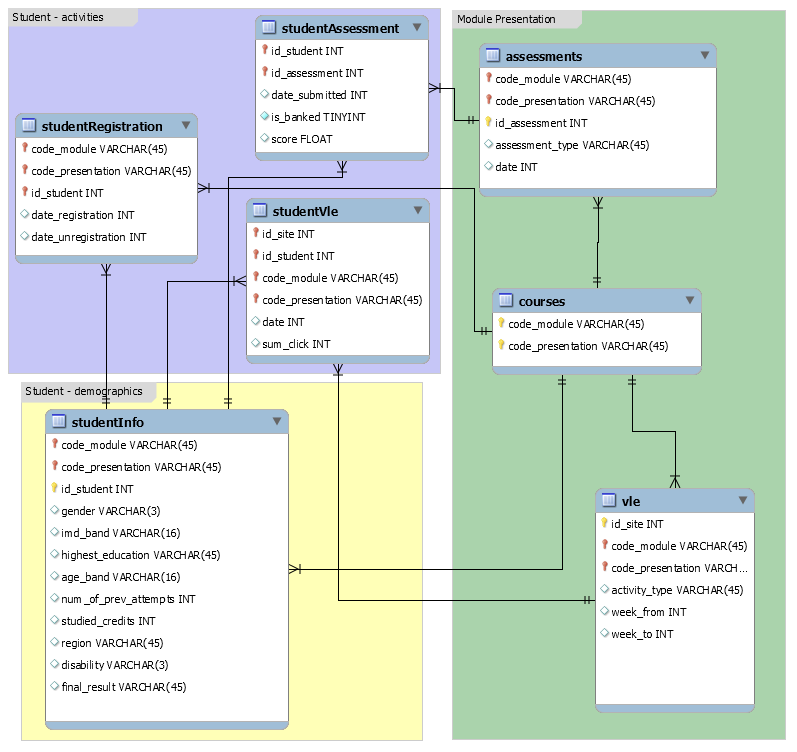

###### In the first step I am merging studentVle table with the vle table. This can show us about the interactions of students with VLE.

In [ ]:
student_vle_merge_vle = oulad_student_vle.merge(oulad_vle, 
                                                on=['id_site', 'code_module', 'code_presentation'],
                                                how = 'left')

In [ ]:
## We can see that there are multiple interactions from a single student even before the course started. We can assume
## that if student is interested in the course then that student will interact with the material of course before the
## course starts

## Number of clicks before the course can be an importtant factor which can help us determine whether student will
## perform good or bad in the course. Therefore for each student we will calculate the number of clicks before and
## after course went live

student_vle_merge_vle[(student_vle_merge_vle['id_student']==28400) & (student_vle_merge_vle['date']<0)].head(10)

In [ ]:
student_vle_merge_vle['Click_Timing'] = ['Before' if date < 0 else 'After' for date in student_vle_merge_vle['date']]

In [ ]:
# Creating After clicks and Before Clicks columns based on the data

student_vle_merge_vle['After_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] =='After',
                                                 student_vle_merge_vle['sum_click'], 0)

student_vle_merge_vle['Before_Clicks']= np.where(student_vle_merge_vle['Click_Timing'] =='Before',
                                                 student_vle_merge_vle['sum_click'], 0)

In [ ]:
# Create a new dataframe by Grouping the columns

student_vle_merge_vle_group = student_vle_merge_vle.groupby(['code_module', 
                                                             'code_presentation', 
                                                             'id_student']
                                                            ,as_index=False)['sum_click', 'After_Clicks', 'Before_Clicks'].sum()

In [ ]:
student_vle_merge_vle_group.isnull().sum()

In [ ]:
### Plot describing the way students connect to VLE
### We can see that most of the rows in the data are on ForumNG (Open University Forum Platform),
### oucontent (Open University Content), subpage and homepage.

countplot(90, 0, 15, 12, 'activity_type', student_vle_merge_vle, plot_size=(20, 7))

In [ ]:
# In this step I am plotting average interaction of student with each activity type. 
# We can see that most of the interactions are with the QUIZ, OUCONTENT, GLOSSARY, OUWIKI which is understandable as 
# student interact mostly with content to learn stuff and then use glossary to understand the study material. Also,
# interactions with quiz is evident as after learning something, there are quizzes on the platform after completing chapters.

plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_vle_merge_vle.groupby(['activity_type'], as_index=True)['sum_click'].mean().sort_values(ascending=False).plot(kind='bar')


In [ ]:
student_vle_merge_vle.head()

###### In this step I will merge studentRegistration table with the courses table to understand the related between registrations and length of course

In [ ]:
student_registration_merge_courses = oulad_student_registration.merge(oulad_courses, 
                                                                      on = ['code_module', 'code_presentation'],
                                                                      how = 'left')

In [ ]:
student_registration_merge_courses['Year'] = student_registration_merge_courses['code_presentation'].str[0:4]
student_registration_merge_courses['Starting_Month'] = ['February' if code[-1] == 'B' else 'October' 
                                                        for code in student_registration_merge_courses['code_presentation']]

In [ ]:
student_registration_merge_courses

In [ ]:
# We can clearly see from the below plot that mMore registrations are in the month of October as compared to the month
# of February. Also there are more people who drawn in the month of October.

countplot(90, 0, 14, 10, 'Starting_Month', student_registration_merge_courses, plot_size=(8, 6), hue=True, hue_column_name='date_unregistration')


In [ ]:
### This plot shows us that there are more registrations in 2014 as compared to 2013

countplot(90, 0, 14, 10, 'Year', student_registration_merge_courses, plot_size=(5, 5))

In [ ]:
# This plot shows us the count by year and then by data unregistration count

countplot(90, 0, 14, 10, 'Year', student_registration_merge_courses, plot_size=(8, 6), hue=True, hue_column_name='date_unregistration')



In [ ]:
### From the below table we can see that course length doesn't have much difference for the student who withdrawn
### and students who completed the course

student_registration_merge_courses.groupby('date_unregistration', as_index=False)['module_presentation_length'].mean()

###### In this step I will merge assessments Table with the studentAssessment Table to understand the relationship between assessment and student performance

In [ ]:
student_assessment_merge_assessment = oulad_student_assessment.merge(oulad_assessment,
                                                                     on = ['id_assessment'], how='left' )

In [ ]:
student_assessment_merge_assessment.dtypes

In [ ]:
# There would have been instances where students submitted their assignments later than the deadline. In this step,
# using the date_submitted (days after student recieved their assignment) column and date (deadline in days for the assignment)
# we can check whether their was a late submission or not (0 : Late, 1:OnTime)

student_assessment_merge_assessment['Late_submission'] = ['0' if int(student_assessment_merge_assessment['date_submitted'].iloc[i]) 
                                                          > int(student_assessment_merge_assessment['date'].iloc[i]) else '1' 
                                                         for i in range(len(student_assessment_merge_assessment))]


In [ ]:
print('Percentage of Late Submissions From Students are : ')
print((len(student_assessment_merge_assessment[student_assessment_merge_assessment['Late_submission']=='0'])/len(student_assessment_merge_assessment)*100))
print('We can see that approximately 30 percent of students submitted their assigments late')

In [ ]:
# There are three types of assessments :- Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA), Exams
# Following Plot Shows us the Percentage of Late Submission by Assessment_Type
# We can see that Most of the late submissions are for Final Exam and CMA which is Computer marked exam.
# Tutor marked exams has the least late submissions

stacked_plot(student_assessment_merge_assessment, 'assessment_type', 'Late_submission', 'id_student', plot_size=(10, 7))



In [ ]:
# There are 7 course modules. 4 are from STEM and 3 from Social Sciences
# Social Sciences :- AAA, BBB, GGG
# STEM :- CCC, DDD, EEE, FFF
# We can see from the plot that most percentage of the late submissions are for Course BBB, CCC and DDD


stacked_plot(student_assessment_merge_assessment, 'code_module', 'Late_submission', 'id_student', plot_size=(12, 8))

In [ ]:
## Creating a column for Social Science and STEM field

student_assessment_merge_assessment['Code_Category'] = ['Social_Science' if student_assessment_merge_assessment['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                                        else 'STEM' for i in range(len(student_assessment_merge_assessment))]


In [ ]:
## Social Science has more percentage of late submissions as compared to STEM


stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Late_submission', 'id_student', plot_size=(8, 7))

In [ ]:
# As from the description of table we know that score less than 40 is considered as Fail and above that is pass


student_assessment_merge_assessment['Result'] = ['Fail' if int(student_assessment_merge_assessment['score'].iloc[i]) < 40
                                                        else 'Pass' for i in range(len(student_assessment_merge_assessment))]

In [ ]:
# Following Plot shows us the Ratio of Pass and Fail students in the form of plot
# Failure Rate in STEM is more as compared to Social Sciences

stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Result', 'id_student', plot_size=(10, 7))

In [ ]:
# We can see from the following plot that course DDD , CCC and BBB have the most failure rate. Out of the 3
# courses 2 of them are from STEM.


stacked_plot(student_assessment_merge_assessment, 'code_module', 'Result', 'id_student', plot_size=(15, 8))

In [ ]:
## Weightage of Assignment can have impact on the submissions and Result of students. I categorized the weight into
## Low, Medium and High Weightage.

print(student_assessment_merge_assessment['weight'].unique())

percentage_segment = []

for percent in student_assessment_merge_assessment['weight']:
    if percent <= 10:
        percentage_segment.append('Low_Weightage')
    elif percent > 10 and percent <= 30:
        percentage_segment.append('Medium_Weightage')
    else:
        percentage_segment.append('High_Weightage')
        
student_assessment_merge_assessment['Weigthage'] = percentage_segment

In [ ]:
# We can see that Medium and High Weightage Assessments have high failure rate as compared to low

stacked_plot(student_assessment_merge_assessment, 'Weigthage', 'Result', 'id_student', plot_size=(8, 6))

In [ ]:
# Following Plot shows the ratio of Pass and Fail in Late_submission.
# We can clearly see that Late Submissions have more Failure Rate as compared to people who submit on time.

stacked_plot(student_assessment_merge_assessment, 'Late_submission', 'Result', 'id_student', plot_size=(8, 6))

In [ ]:
student_assessment_merge_assessment.head()

###### MERGING VLE DATA WITH THE STUDENT INFO DATA

In [ ]:
student_info = oulad_student_info.merge(student_vle_merge_vle_group, 
                                        on = ['code_module', 'code_presentation', 'id_student'],
                                        how = 'left')

student_info['sum_click']     = student_info['sum_click'].fillna(student_info['sum_click'].mean())
student_info['After_Clicks']  = student_info['After_Clicks'].fillna(student_info['After_Clicks'].mean())
student_info['Before_Clicks'] = student_info['Before_Clicks'].fillna(student_info['Before_Clicks'].mean())

In [ ]:
## In this plot I am trying to examine the relationship between number of clicks versus the result
## We can clearly see from the plot that number of clicks is directly related to the result. Student who passed with
## Distinction has significantly more clicks as compared to ones with result = PASS and there is a huge difference
## between the students who failed or withdrawn as compared to the one's who passed with or without distinction

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['After_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

In [ ]:
## Even from the clicks data before the course even started, we can see that more the clicks more are the chances
## for student to pass.

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['Before_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

In [ ]:
## People with less credits have more chances to pass with distinction or pass because they have to study less
## People who withdrew has more average credits as compared to another. 

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending = False).plot(kind='bar')

In [ ]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['age_band'])['Before_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

In [ ]:
# Number of Clicks by imd_band.

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['imd_band'])['sum_click'].sum().sort_values(ascending = False).plot(kind='bar')

In [ ]:
# We can see that Males have higher Click Rate as compared to the females

plt.figure(figsize = (8, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['gender'])['sum_click'].sum().sort_values(ascending = False).plot(kind='bar')

In [ ]:
## Following plot shows us the number of students in each result category. Most of the data is in age band 0-55.
## There are very few data points for age >= 55. 
## We can see that Failure and Withdrawn rate is greater in age_band 0-35

print(student_info.groupby(['age_band', 'final_result'])['id_student'].count().sort_values(ascending = False))
stacked_plot(student_info, 'age_band', 'final_result', 'id_student', plot_size=(10, 8))

In [ ]:
# We can see from the plot that Failure Rate and Withdrawal Rate is high in people who have NO FORMAL EDUCATION
# and who have LOWER THAN A LEVEL EDUCATION
# Failure Rate is lowest in people who has Post Graduation.


stacked_plot(student_info, 'highest_education', 'final_result', 'id_student', plot_size=(10, 8))

In [ ]:
## We can see from the plot that most of the data is for people who have a level or lower level of education.
## This will cause an imbalance when the feature is used in the model. So I will manipulate the feature and 
## create two categories. One with higher education and one with lower education.

countplot(90, 0, 12, 10, 'highest_education', student_info)

In [ ]:
student_info['highest_education'].unique()

In [ ]:
## Manioulating the feature higher_education

student_info['highest_education'] = [0 if education in ['A Level or Equivalent', 'Lower Than A Level', 'No Formal quals']
                                    else 1 for education in student_info['highest_education']]


In [ ]:
countplot(90, 0, 12, 10, 'highest_education', student_info, plot_size=(7, 6))

In [ ]:
## We can see from the plot that students with lower education has higher failure rate than the ones who had higher education

stacked_plot(student_info, 'highest_education', 'final_result', 'id_student', plot_size=(10, 8))

In [ ]:
## We can see that Failure Rate and Withdrawal rate is similar in all the regions.

stacked_plot(student_info, 'region', 'final_result', 'id_student', plot_size=(15, 8))

In [ ]:
stacked_plot(student_info, 'imd_band', 'final_result', 'id_student', plot_size=(15, 8))

In [ ]:
# We can see that Males are more in number as compared to females

countplot(90, 0, 14, 10, 'gender', student_info, plot_size=(5, 5))

In [ ]:
## We can see that there is no difference between the Withdrawal Rates and Failure Rates for both the gender.

stacked_plot(student_info, 'gender', 'final_result', 'id_student', plot_size=(10, 8))

In [ ]:
# Following plot shows us the results by disability.
# Withdrawn Rate is more in People who are disable.


stacked_plot(student_info, 'disability', 'final_result', 'id_student', plot_size=(15, 8))

###### Combining Student Info with the Student Registration Table

In [ ]:
student_registration_merge_courses = student_registration_merge_courses.drop('date_unregistration', axis = 1)

In [ ]:
student_info = student_info.merge(student_registration_merge_courses,
                                 on = ['code_module', 'code_presentation', 'id_student'],
                                 how = 'left')

In [ ]:
## Following Plot shows us the Result by Session. Failure Rate is more in people who took the course in February.
## Also withdrawn rate is slightly more in course starting in February. 

stacked_plot(student_info, 'Starting_Month', 'final_result', 'id_student', plot_size=(15, 8))

In [ ]:
## There are less people who registered in February as compared to October. But still the failure and withdrawn rate
## is more for february. May be the students don't like content or the course in February.

countplot(90, 0, 12, 10, 'Starting_Month', student_info, plot_size=(7, 6))

In [ ]:
## We can clearly see from the plot that we have the least failure and withdrawn rate in the students who did not
## took the course before or number of previous attempts are zero. 

stacked_plot(student_info, 'num_of_prev_attempts', 'final_result', 'id_student', plot_size=(15, 8))


In [ ]:
# Most of the data is for zero attempts which cause imbalance in the feature. We need to collect more data for creating
# balance in the feature. So instead of using this feature, we will manipulate the feature to create two categories only.
# 0 and 1 where 0 show no previous attempts and 1 shows previous attempts.

countplot(90, 0, 12, 10, 'num_of_prev_attempts', student_info, plot_size=(10, 8))

In [ ]:
student_info['num_of_prev_attempts'] = [0 if attempts == 0 else 1 for attempts in student_info['num_of_prev_attempts']]

In [ ]:
## Still there is imbalance in the feature but it's better than the initial.

countplot(90, 0, 12, 10, 'num_of_prev_attempts', student_info, plot_size=(7, 6))

In [ ]:
# We can clearly see that people with previous attempts have more failure and withdrawn rate.

stacked_plot(student_info, 'num_of_prev_attempts', 'final_result', 'id_student', plot_size=(15, 8))

In [ ]:
## We can see that 

stacked_plot(student_info, 'code_module', 'final_result', 'id_student', plot_size=(15, 8))

In [ ]:
student_info['Code_Category'] = ['Social_Science' if student_info['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                 else 'STEM' for i in range(len(student_info))]

In [ ]:
## From the following plot we can see that Failure Rate is higher in Social Science and Withdrawn rate is higher in
## STEM Courses.

stacked_plot(student_info, 'Code_Category', 'final_result', 'id_student', plot_size=(15, 8))

# DATA PREPARATION
#### Feature Selection
#### Data Encoding
#### Splitting Data

In [ ]:
# In this step, I will remove code_module, code_presentation, id_student and Year as those won't have impact on the result 

student_info = student_info.drop(['code_presentation', 'id_student', 'Year'], axis = 1)

In [ ]:
student_info['date_registration'] = student_info['date_registration'].astype(float)

In [ ]:
student_info['date_registration'].describe()

In [ ]:
student_info.head()

In [ ]:
# There are two types of categorical variables in the data.
# 1. NOMINAL :- Here there is no order in the categories
# 2. ORDINAL :- When there is order in the category

nominal_columns = ['gender', 'region', 'disability', 'Starting_Month', 'code_module', 'Code_Category']
ordinal_columns = ['highest_education', 'imd_band', 'age_band']

In [ ]:
data = labelEncoder(student_info, ordinal_columns)
data = categorical_encoding(student_info, nominal_columns)

In [ ]:
countplot(90, 0, 10, 10, 'final_result', data, plot_size=(10, 7))

### In the First case I am assuming Withdrawn Class as Fail and I am building a model whether student will pass or fail.
### In the Second case I will create a labels for dropout vs non-dropout and build a model using that

In [ ]:
## To built a simplified binary class model, I am labeling Distinction and Pass as 0 and Withdrawn and Failure as 1

data['Result']  = [0 if result in ['Pass', 'Distinction'] else 1 for result in data['final_result']]

In [ ]:
## In this steP, I am creating a dropout column where we consider withdrawn as the dropout and everything else as no dropout
## '0' : Not Withdrawn, '1': 'Withdrawn'

data['dropout'] = [0 if result in ['Pass', 'Distinction', 'Fail'] else 1 for result in data['final_result']]

In [ ]:
## Creating Feature and Target Dataframes

feature = data.drop(['final_result', 'Result'], axis = 1)
target  = data['Result']

In [ ]:
## We can see that both the classes are close in numbers. So I will treat this as a balanced case of binary classification.

target.value_counts()

In [ ]:
### Here we will split our data into training and testing. As we have less data, I will keep 80% of the data for 
### training and only 20% for testing. I would like to have more data where I can create three separate datasets
### for training, validation and testing. As our objective here is to find features which impact the decision whether
### student will fail or not, I will use most for training only.

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, 
                                                    test_size = 0.2, 
                                                    random_state = 123, 
                                                    stratify=data.final_result)

In [ ]:
# In this step I will create a feature and target set for the dropout vs non-dropout case

feature_dropout = data.drop(['final_result', 'dropout', 'Result'], axis = 1)
target_dropout  = data['dropout']

In [ ]:
target_dropout.value_counts()

In [ ]:
## Splitting Data into training and test sets

X_train_dropout, X_test_dropout, Y_train_dropout, Y_test_dropout = train_test_split(feature_dropout, target_dropout, 
                                                                                    test_size = 0.2, 
                                                                                    random_state = 123, 
                                                                                    stratify=target_dropout)

In [ ]:
data.head()

# BUILDING AND EVALUATING MODEL

#### Building a model to predict whether student will pass or fail

In [ ]:
## Initializing the Random Forest Model

random_forest_model = RandomForestClassifier(n_estimators=100, 
                                             random_state=123, 
                                             max_depth=25,
                                             min_samples_split = 100,
                                             n_jobs=4)

In [ ]:
## Fitting the model using Training Data

random_forest_model.fit(X_train, Y_train)

In [ ]:
## Predicting on Test Data using fitted model

predictions_random = random_forest_model.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, predictions_random))

In [ ]:
print("Accuracy of the model is ", accuracy_score(Y_test, predictions_random))

In [ ]:
print(classification_report(Y_test, predictions_random, digits=2))

In [ ]:
predictions_rf = random_forest_model.predict_proba(X_test)
preds = predictions_rf[:,1]
y_test = np.array(Y_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### USING GRID SEARCH FOR HYPERPARAMETER OPTIMIZATION

In [ ]:
# n_estimators      = [100, 300, 500, 800, 1200]
# max_depth         = [5, 8, 15, 25, 30]
# min_samples_split = [50, 100, 150, 250, 300]
# min_samples_leaf  = [1, 2, 5, 10] 

# hyperF  = {'n_estimators' : n_estimators, 
#            'max_depth' : max_depth,  
#            'min_samples_split' : min_samples_split, 
#            'min_samples_leaf' : min_samples_leaf}

# gridF   = GridSearchCV(random_forest_model, hyperF, cv = 3, verbose = 1)
# bestF   = gridF.fit(X_train, Y_train)

In [ ]:
# bestF.best_params_

# {'max_depth': 30,
#  'min_samples_leaf': 1,
#  'min_samples_split': 50,
#  'n_estimators': 100}

In [ ]:
random_forest_model_best_fit = RandomForestClassifier(n_estimators=100, 
                                                      random_state=123, 
                                                      max_depth=30,
                                                      min_samples_split = 50,
                                                      n_jobs=4)

In [ ]:
random_forest_model_best_fit.fit(X_train, Y_train)

In [ ]:
predict_best_fit = random_forest_model_best_fit.predict(X_test)

In [ ]:
print(classification_report(predict_best_fit, Y_test))

In [ ]:
## We can see that region has close to None impact on the output of the model. So we will remove this feature.

importance = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(random_forest_model.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coeff']
importance = importance.sort_values('Coeff', ascending=False)
importance

#### Building a model to predict whether student will dropout or not

In [ ]:
## I am using class weight in this case because we have less samples for class = 1 which is dropout

random_forest_model_drop = RandomForestClassifier(n_estimators=100, 
                                                  random_state=123, 
                                                  max_depth=25,
                                                  min_samples_split = 100,
                                                  class_weight = {0: 1, 1: 2},
                                                  n_jobs=4)

In [ ]:
random_forest_model_drop.fit(X_train_dropout, Y_train_dropout)

In [ ]:
predict_dropout = random_forest_model_drop.predict(X_test_dropout)

In [ ]:
print(classification_report(predict_dropout, Y_test_dropout))

In [ ]:
predictions_rf = random_forest_model_drop.predict_proba(X_test_dropout)
preds = predictions_rf[:,1]
y_test = np.array(Y_test_dropout)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
importance = pd.concat([pd.DataFrame(X_train_dropout.columns),
                          pd.DataFrame(np.transpose(random_forest_model_drop.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coeff']
importance = importance.sort_values('Coeff', ascending=False)
importance